In [2]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

On commence montrer comment cette fonction peut créer une distribution uniforme entre 0 et 1 et donc a et b

In [3]:
a=0
b=10
x = numpy.random.random_sample(100000)
y = (b-a)*x+a

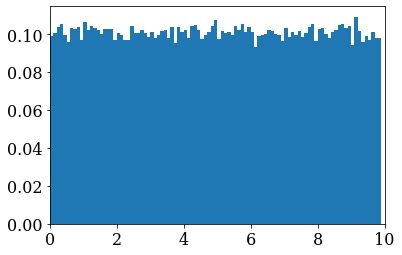

In [4]:

binwidth=0.1
pyplot.xlim(0,10)
pyplot.hist(y,bins=numpy.arange(0.,10., binwidth),density=True);


On produit maintenant une distribution exponentielle avec la méthode de la fonction cumultative inverse avec $\alpha$=1 :

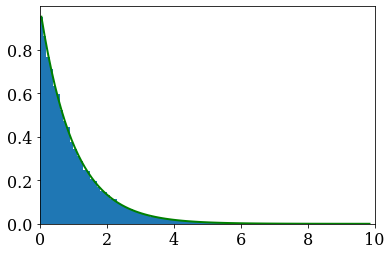

In [5]:
alpha = 1.0
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Histogramme
binwidth=0.1
pyplot.xlim(0,10)
bins=numpy.arange(0.,10., binwidth)
pyplot.hist(y,bins,density=True);

# centrage des bins et fit 
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2, color='green')


On produit maintenant une distribution gaussienne centrée en $\mu=0$ de $\sigma=1$ avec la méthode de Von Neumann et K=1.4 (on voit graphiquement que la condition pour appliquer la méthode est validée)

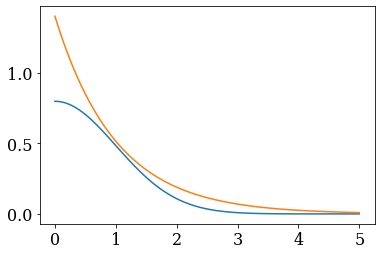

In [6]:
mu= 0
sigma= 1
K= 1.4

nx= 100
xi= numpy.linspace(0,5,nx)  #graphe de 0 à 5

f1= 2*numpy.exp(-xi**2/2.0)/numpy.sqrt(2*numpy.pi)
f2= K*numpy.exp(-numpy.abs(xi))

pyplot.plot(xi,f1)
pyplot.plot(xi,f2)

algo de Von Neumann : 

ratio de nombres gardés 0.35592


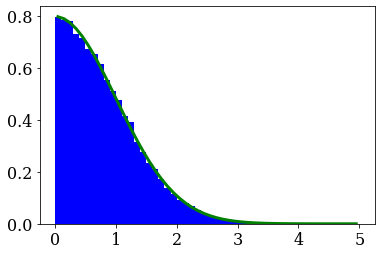

In [7]:
N=100000
mu= 0
sigma= 1
K = 1.4
alpha = 1.0

# On produit la distribution exponentielle avec la méthode précédente
u1 = numpy.random.random_sample(N)
x = -1/alpha*numpy.log(1-u1) 

# Probabilité d'obtenir x selon la distribution exponentielle (alpha=1)
p_x_exp = numpy.exp(-x)

# Probabilité d'obtenir x selon la distribution gaussienne (mu=0, sigma=1)
p_x_gauss = numpy.exp(-(x - mu)**2/(2.0*sigma**2))/(numpy.sqrt(2*numpy.pi)*sigma **2)

# autre variable uniforme pour la sélection des chiffres que l'on prend
                      
u2 = numpy.random.random_sample(N)

# condition d'exctraction
condition = u2 < p_x_gauss / (K*p_x_exp )

# Extraction
h = numpy.extract(condition,x)

# Print the acceptance ratio
print("ratio de nombres gardés",h.size/x.size)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,density='true',color='blue');

# Cntrage des bins et fit
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


# ici on a multiplié par 2 car on a la gaussienne définie positive (il faut donc ajuster la constante de normalisation)




En fait les distributions de probabilités usuelles sont toutes déjà implémentées sur python, on a déjà vu la distribution uniforme au début. Regardons la gaussienne et l'exponentielle : 

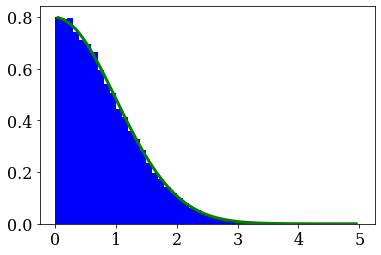

In [8]:
#utilisions le générateur aléatoires de nombres de distribution gaussienne : 

N=100000
mu= 0
sigma= 1

y = numpy.random.normal(loc=mu, scale=sigma, size = N)

#plot
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(y,bins,density='true',color='blue');

#centrage bin + fit

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

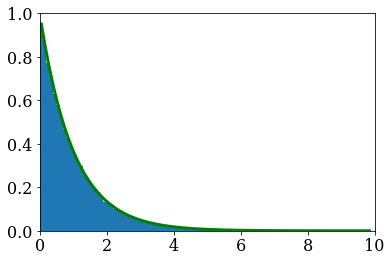

In [9]:
#utilisions le générateur aléatoires de nombres de distribution exponentielle :

N=100000
sigma=1

y = numpy.random.exponential(scale=sigma, size=N)

#plot

binwidth=0.1
pyplot.xlim(0,10)
bins=numpy.arange(0.,10., binwidth)
pyplot.hist(y,bins,density=True);

#centrage bins + fit

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=3, color='green')

Un dernier exemple, la distribution Beta 

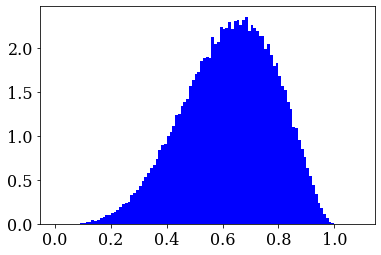

In [10]:
#utilisions le générateur aléatoires de nombres de distribution beta avec a=5 et b=3 : 

N=100000
a= 5
b= 3

y = numpy.random.beta(a, b, size = N)

#plot
binwidth=0.01
bins=numpy.arange(0.,1.1, binwidth)
pyplot.hist(y,bins,density='true',color='blue');


Enfin il existe un algorithme très connu qui permet de donner des variables aléatoires distribuées selon une distribution Gaussienne : 
L'algorithme de Box-Muller : 

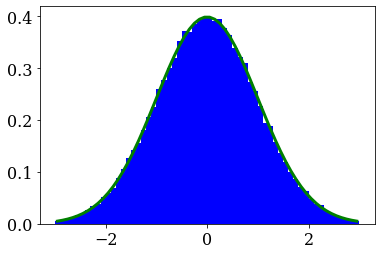

In [11]:
#l'algorithme de Box Muller pour une distibution gausienne (mu=0,sigma=1) soit N(0,1)

N=100000

u1 = numpy.random.random_sample(N)
u2 = numpy.random.random_sample(N)

y = numpy.sqrt(-2*numpy.log(u1)) * numpy.cos(2*numpy.pi*u2)

#plot
binwidth=0.1
bins=numpy.arange(-3.,3.1, binwidth)
pyplot.hist(y,bins,density='true',color='blue');

#centrage bin + fit

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


On passe maintenant au problème de diffusion, on commence par le résoudre sans paramètre c (de vitesse) ni gamma (de friction):

l'équation d'évolution est alors donnée par $dx= ds = \sqrt{2\alpha dt} N(0,1)$ 
où $\alpha$ est la paramètre de l'équation de diffusion et N(0,1) est une variable aléatoire distribuée selon une gaussienne centrée en  $\mu=0$ et d'écart type $\sigma =1$

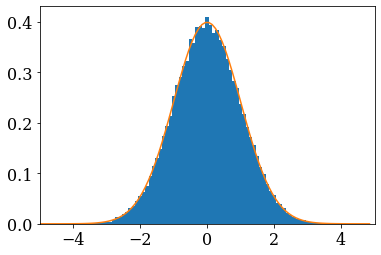

In [31]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16



#on génère la position initialle d'un set de particule npart centrées en 0 selon une ditribution gaussienne sigma=1

npart=100000

mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)

# On génere des bins qu'on centre en 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins - binwidth/2

# les bins sont déjà centrée pour le fit
bin_centers = bins

# Plot de l'hito et fit de la disrtibution attendue 
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,density=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

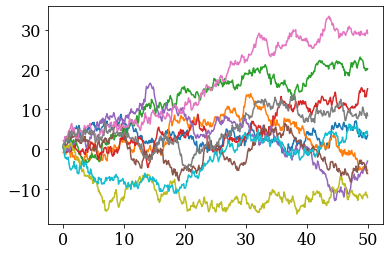

In [13]:
# on simule maintenant l'évolution de ces particules en implémentant la gaussienne centrée d'évolution avec
# mu2=0 et sigma2 =1 egalement : 

T=50.0
nt=500
dt=T/nt
alpha=2.0  #on pose le paramètre de diffusion

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])


mu2=0
sigma2=1

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(loc=mu2,scale=sigma2,size=npart)
    
# On regarde l'évolution des 10 premières particules   

for i in range(10):
    pyplot.plot(t,x[:,i])
    
    

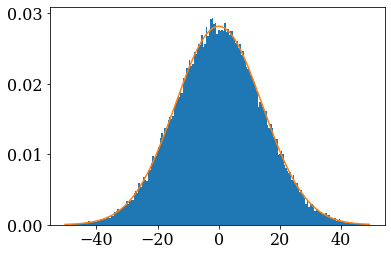

In [14]:
#on trace maintenant la distribution obtenue à la fin et on voit bien qu'elle est gaussienne comme attendu : 

#binning + centrage 
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins - binwidth/2

# bins déjà centrée
bin_centers = bins

# on vérifie avec un histogramme qu'on a bien le comportemant attendu avec l'évolution du sigma : 
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2  #la constante sigma attendue apreès l'évolution au carré
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

On a bien obtenu l'évolution attendue, c'est à dire  
$$ p(x,t) = \frac{1}{\sqrt{2\pi} \ \sigma_t}exp [ \frac{(x-\mu)^2}{2 \sigma_t ^2} ]  $$

avec $\sigma_t ^2= 2\alpha t + \sigma^2$

Rajoutons mainenant une vitesse c et obervons ce qui change :

On a que l'équation d'évolution devient $$
dx = ds + c.dt$$

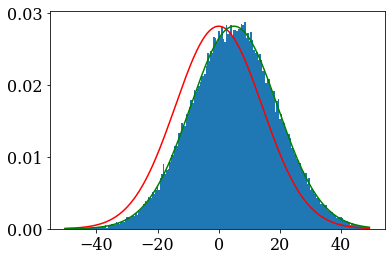

In [15]:
# on rajoute une vitesse c=0,1

#on simule maintenant l'évolution de ces particules en implémentant la gaussienne centrée d'évolution mu2=0 et sigma2 =1 egalement : 

c=0.1
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])


mu2=0
sigma2=1

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(loc=mu2,scale=sigma2,size=npart) + c*dt
    
#on trace maintenant la distribution obtenue à la fin  

#binning + centrage 
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins - binwidth/2

# bins déjà centrée
bin_centers = bins

# plot a histrogram for verification
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2  #la constante sigma attendue dans l'évolution 
mu = 0 
mut = mu + c*T

#distribution attendue sans le c
pyplot.plot(bin_centers, numpy.exp(-(bin_centers -mu)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), color = 'red')

#avec le c donc en changeant mu par mut

pyplot.plot(bin_centers, numpy.exp(-(bin_centers -mut)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), color = 'green')

    


On observe que cette vitesse de groupe (c) a décalée la moyenne de la gaussienne d'une valeur c*T ce qui est tout à fait logique. L'évolution des la distribution est donc donnée par l'expression suivante:

$$ p(x,t) = \frac{1}{\sqrt{2\pi} \ \sigma_t}exp [ \frac{(x-\mu_t)^2}{2 \sigma_t ^2} ]  $$

avec $\sigma_t ^2= 2\alpha t + \sigma^2$ 

et $\mu_t=\mu+c.t$






On ne considère maintenant plus cette vitesse c et on veut connaître l'évolution de la distribution des positions des particules lorsque le temps tend vers l'infini et si on avait ajouté un terme de friction (gamma). Celui-ci se comporte comme suit dans l'équation d'évolution : $$
dx=ds-\gamma.x.dt $$



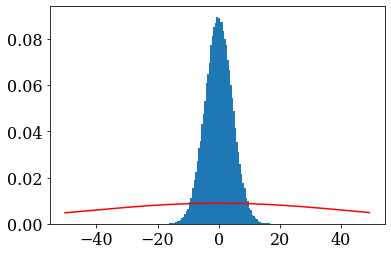

In [21]:
#on le fait mainetant pour la friction avec gamma et on multiplie T (et donc nt) par 10 pour simuler un temps plus grand.

gamma=0.1
T=500.0
nt=5000
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])


mu2=0
sigma2=1

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(loc=mu2,scale=sigma2,size=npart) - gamma*x[i]*dt
    
    
#on trace maintenant la distribution obtenue à la fin en comparaison avec celle attendue

#binning + centrage 
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins - binwidth/2

# bins déjà centrée
bin_centers = bins

# plot a histrogram for verification
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2  #la constante sigma attendue dans l'évolution 
mu = 0 
mut = mu + c*T

#distribution attendue sans le gamma mais quand T tend vers l'infini
pyplot.plot(bin_centers, numpy.exp(-(bin_centers -mu)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), color = 'red')


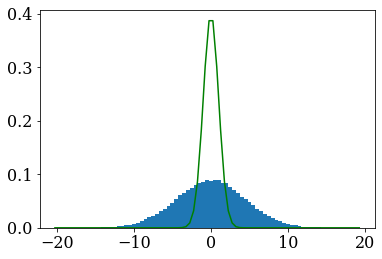

In [17]:
#on trace maintenant la distribution obtenue à la fin en comparaison avec celle au début : 
#binning + centrage 
binwidth=0.5
bins=numpy.arange(-20,20,binwidth)
bins = bins - binwidth/2

# bins déjà centrée
bin_centers = bins

# plot a histrogram for verification
pyplot.hist(x[nt],bins,density=True);


#distribution initiale 
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2),color ='green')

On peut en conclure que ce terme a pour effet de resserer la distribution de position (en rouge l'évolution attendue sans le terme de friction) cependant on voit bien que la distribution s'est tout de même étendue dans l'espace par rapport à la distribution initiale (en vert).  

Je pense que ce facteur $\gamma$ fait ralentir l'applatissement de la distribution des positions jusqu'à ce que l'effet de la friction et de la diffusion se compensent exactement car au plus les particules seront dispersées au plus la friction aura d'impact (à cause du  facteur x).  A ce moment la distribution est donc arrivée à une position d'équilibre (distribution de probabilité finale qui n'évolue plus).

On passe maintenant à la dernière partie de ce devoir consacrée au modèle d'Ising en 2D.  
Le premier challenge est de vérifier l'algorithme de Metropolis. On applique donc ce dernier sur un élément (ici (5,5)) d'une configuration initiale aléatoire de spin dans un tableau 10x10. 



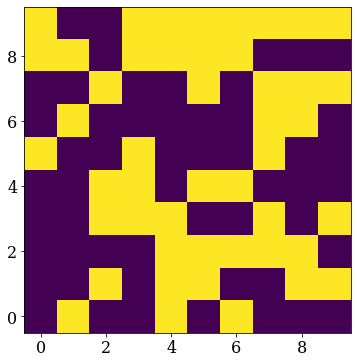

In [18]:
#on commence par vérifier l'algorithme de Metropolis 

#simulation aléatoire d'une configuration initiale 

def initial_state(nx,ny):
    
     # spin aléatoire entier 0 ou 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # quand on a 0 on pose le spin à -1
    r[r==0] =-1

    return r

#on les place maintenant sur une grille 10x10

nx=10
ny=10

# aplha est la costante adimentionnelle (J/K_b T)
alpha = 0.1

# on place le spin aléatoire sur chaque case
sp = initial_state(nx,ny)

pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')
   

In [22]:
def energy_at_site(sp,alpha,ix,iy):
    
    energy= -alpha*sp[ix,iy]*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

def energy_at_site_flipped(sp,alpha,ix,iy) :
    
    energy2 =  alpha*sp[ix,iy]*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])
    
    return energy2


def delta_E(sp,alpha,ix,iy) :

    deltaE = energy_at_site_flipped(sp,alpha,ix,iy) - energy_at_site(sp,alpha,ix,iy)
    
    return deltaE

print("deltaE(5,5)", delta_E(sp,alpha,5,5))




#vérification on regarde donc que p2/p1=e^(-delta E) pour la case (5,5) : on définit p_up/P_down en fonction de l'etat initial

def Rapport_Pup_Pdown (sp,alpha,ix,iy) :
    if ((sp[ix,iy])==1) :
        Rapport = numpy.exp( delta_E(sp,alpha,ix,iy))

    if ((sp[ix,iy])==-1) :

        Rapport = numpy.exp( - delta_E(sp,alpha,ix,iy))
    
    return Rapport


print ("rapport théorique P_up/P_down",Rapport_Pup_Pdown (sp,alpha,5,5))



# on passe maintenant à l'algo métropolis :

def metropolis_at_site(sp,alpha,ix,iy):
    
    if (numpy.random.random()<numpy.exp(- delta_E(sp,alpha,ix,iy))):
        sp[ix,iy]= -sp[ix,iy]





deltaE(5,5) -8.0
rapport théorique P_up/P_down 0.00033546262790251185


In [23]:
# appliquons Metropolis à la case (5,5) un grand nombre de fois 

NM = 100000
states = numpy.empty(NM+1)
states[0]=sp[5,5]

for n in range(0,NM):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

    
ups = numpy.extract(states==1, states).size
downs = NM - ups


print("rapport métropolis",ups/downs)

rapport métropolis 0.0003501225428900115


L'algorithme Metropolis donne donc un résultat bien en accord avec le résultat théorique attendu.


Appliquons maintenant l'algorithme métropolis sur un système beaucoup plus grand (grille 100x100) avec comme condition initiale que des spins up.  Pour cela on applique par itération 100x100 fois l'algo sur une case aléatoire et on observe l'évolution de la somme des spins de l'état final.  Le but de cette démarche est d'appliquer cet algorithme pour différentes valeurs du paramètre alpha et ainsi d'estimer par simulation la valeur de ce paramètre (lié à la température de Curie) pour laquelle un matériau perd son ferromagnétisme c'est à dire à en dessou de laquelle la somme des spins évolue vers 0.

In [24]:
#on va commencer par une configuration initiale uniforme que des spins up et regarder l'énergie moyenne en fct de alpha

nx = 100
ny = 100

sp = numpy.ones([nx,ny])


In [25]:
# on refait l'algo metropolis et chaque étape se fait sur nx*ny cases aléatoires du système:

def ising_model_metropolis(sp, NM, nx, ny, alpha):  
    
    states = numpy.empty([NM+1,nx,ny])
    states[0] = sp.copy()
    
    
    for i in range(1,NM+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [26]:
#on applique cette méthode pour différents alpha entre 0 et 1

NM=100
alpha=0.1
states_0_1 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.3
states_0_3 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.4
states_0_4 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.5
states_0_5 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.6
states_0_6 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NM, nx, ny, alpha)


sp = numpy.ones([nx,ny])
NM=100
alpha=0.8
states_0_8 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.9
states_0_9 = ising_model_metropolis(sp, NM, nx, ny, alpha)



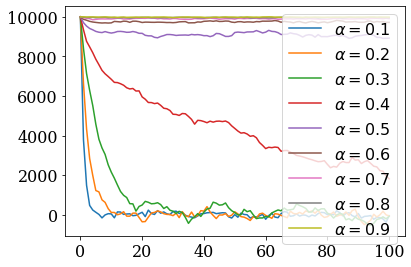

In [27]:
pyplot.figure()
pyplot.plot(states_0_1.sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_8.sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states_0_9.sum(axis=(1,2)),label=r'$\alpha=0.9$')

pyplot.legend()
pyplot.tight_layout()

On observe donc que cela se produit pour une valeur proche de $\alpha \simeq 0,4$.

La solution exacte de Onsager nous donne l'aimantation par spin en fonction de $\alpha$ (http://www.lps.ens.fr/~krzakala/td9.pdf) :

$m(\alpha) = [1-\frac{1}{\sinh(2\alpha)^4}]^\frac{1}{8}$

On trouve donc que l'aimantation devient nulle pour $\alpha = 0,44...$ ce qui est bien en accord avec ce que l'on observe.

Pour terminer, nous allons recommencer cette analyse avec d'autres conditions initiales.  On commence par mettre un spin up partout au bord et un spin aléatoire à l'intérieur.
Voila ce qu'on obtient comme configuration initiale : 

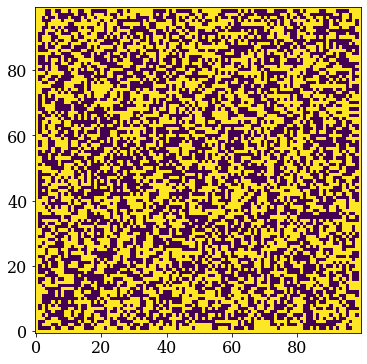

In [28]:
def initial_state2(nx,ny):
    
     # spin aléatoire entier 0 ou 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # quand on a 0 on pose le spin à -1
    r[r==0] =-1
    
    # on met tout le bord en spin +1
    r[0,:] =1
    r[:,0] =1
    r[-1,:] =1
    r[:,-1] =1

    return r


nx = 100
ny = 100

sp = initial_state2(nx,ny)

pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

In [29]:
NM=100
alpha=0.1
states_0_1 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = initial_state2(nx,ny)
NM=100
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = initial_state2(nx,ny)
NM=100
alpha=0.3
states_0_3 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = initial_state2(nx,ny)
NM=100
alpha=0.4
states_0_4 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = initial_state2(nx,ny)
NM=100
alpha=0.5
states_0_5 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = initial_state2(nx,ny)
NM=100
alpha=0.6
states_0_6 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = initial_state2(nx,ny)
NM=100
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NM, nx, ny, alpha)


sp = initial_state2(nx,ny)
NM=100
alpha=0.8
states_0_8 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = initial_state2(nx,ny)
NM=100
alpha=0.9
states_0_9 = ising_model_metropolis(sp, NM, nx, ny, alpha)

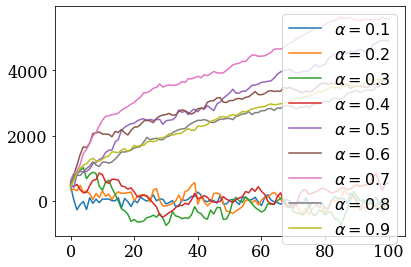

In [30]:
pyplot.figure()
pyplot.plot(states_0_1.sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_8.sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states_0_9.sum(axis=(1,2)),label=r'$\alpha=0.9$')

pyplot.legend()
pyplot.tight_layout()

On obtient un résultat équivalent, on voit bien que pour $\alpha < 0,5$ l'aimantation reste quasiment nulle (température de Curie) tandis qu'au dessu de 0,5 les conditions initiales des spins up au bord tendent à alligner les spins de l'intérieur vers le haut et notre matériau est donc ferromagnétique.